# Tasks for laboratory assignment 3

In [11]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures


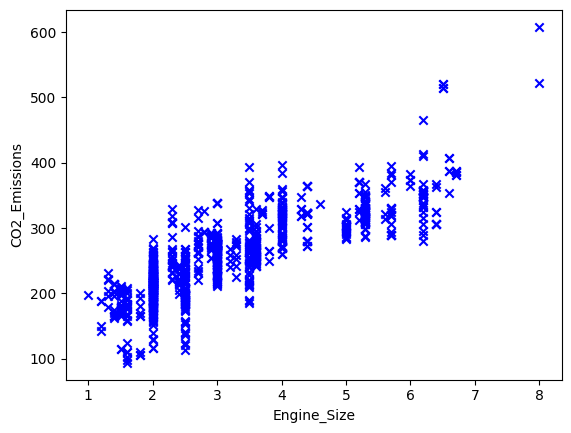

In [10]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('/content/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [12]:
def extract_texts_from_file(file_path):
    """
    Extract the text data from the csv file

    Args:
        file_path (str): Relative location of the csv file in the project.

    Returns:
        list: The list of texts as strings.
    """
    texts = []
    with open(file_path, encoding="utf-8") as f:
        reader = csv.reader(f)
        for row in reader:
            texts.append(",".join(row))   # перетворюємо числа на рядок
    return texts

data = extract_texts_from_file('/content/heart.csv')
print(data[:50])

['age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output', '63,1,3,145,233,1,0,150,0,2.3,0,0,1,1', '37,1,2,130,250,0,1,187,0,3.5,0,0,2,1', '41,0,1,130,204,0,0,172,0,1.4,2,0,2,1', '56,1,1,120,236,0,1,178,0,0.8,2,0,2,1', '57,0,0,120,354,0,1,163,1,0.6,2,0,2,1', '57,1,0,140,192,0,1,148,0,0.4,1,0,1,1', '56,0,1,140,294,0,0,153,0,1.3,1,0,2,1', '44,1,1,120,263,0,1,173,0,0,2,0,3,1', '52,1,2,172,199,1,1,162,0,0.5,2,0,3,1', '57,1,2,150,168,0,1,174,0,1.6,2,0,2,1', '54,1,0,140,239,0,1,160,0,1.2,2,0,2,1', '48,0,2,130,275,0,1,139,0,0.2,2,0,2,1', '49,1,1,130,266,0,1,171,0,0.6,2,0,2,1', '64,1,3,110,211,0,0,144,1,1.8,1,0,2,1', '58,0,3,150,283,1,0,162,0,1,2,0,2,1', '50,0,2,120,219,0,1,158,0,1.6,1,0,2,1', '58,0,2,120,340,0,1,172,0,0,2,0,2,1', '66,0,3,150,226,0,1,114,0,2.6,0,0,2,1', '43,1,0,150,247,0,1,171,0,1.5,2,0,2,1', '69,0,3,140,239,0,1,151,0,1.8,2,2,2,1', '59,1,0,135,234,0,1,161,0,0.5,1,0,3,1', '44,1,2,130,233,0,1,179,1,0.4,2,0,2,1', '42,1,0,140,226,0,1,178,0,0,2,0,2,1', '61,1,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

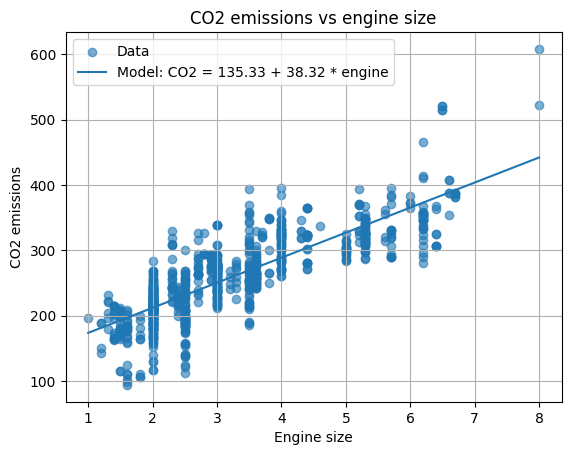

[135.32605460263238, 38.32301106042744]

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def CO2_emissions(data):

    if not data:
        raise ValueError("Empty data passed to CO2_emissions")


    header = data[0].strip().split(",")
    header_lower = [h.lower() for h in header]


    try:
        engine_idx = next(i for i, h in enumerate(header_lower) if "engine" in h)
        co2_idx    = next(i for i, h in enumerate(header_lower) if "co2" in h)
    except StopIteration:
        raise ValueError("Could not find 'engine' or 'CO2' columns in header: " + str(header))

    engine_sizes = []
    co2_values = []

    for row in data[1:]:
        if not row.strip():
            continue
        parts = row.strip().split(",")

        if len(parts) <= max(engine_idx, co2_idx):
            continue
        try:
            eng = float(parts[engine_idx])
            co2 = float(parts[co2_idx])
        except ValueError:

            continue

        engine_sizes.append(eng)
        co2_values.append(co2)

    engine_sizes = np.array(engine_sizes, dtype=float)
    co2_values   = np.array(co2_values, dtype=float)

    X = np.column_stack([np.ones_like(engine_sizes), engine_sizes])
    y = co2_values.reshape(-1, 1)


    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    theta = theta.flatten()

    plt.figure()

    plt.scatter(engine_sizes, co2_values, alpha=0.6, label="Data")

    x_line = np.linspace(engine_sizes.min(), engine_sizes.max(), 100)
    y_line = theta[0] + theta[1] * x_line
    plt.plot(x_line, y_line, label=f"Model: CO2 = {theta[0]:.2f} + {theta[1]:.2f} * engine")

    plt.xlabel("Engine size")
    plt.ylabel("CO2 emissions")
    plt.title("CO2 emissions vs engine size")
    plt.legend()
    plt.grid(True)
    plt.show()

    return theta.tolist()


data = extract_texts_from_file('/content/CO2_emission.csv')
CO2_emissions(data)

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

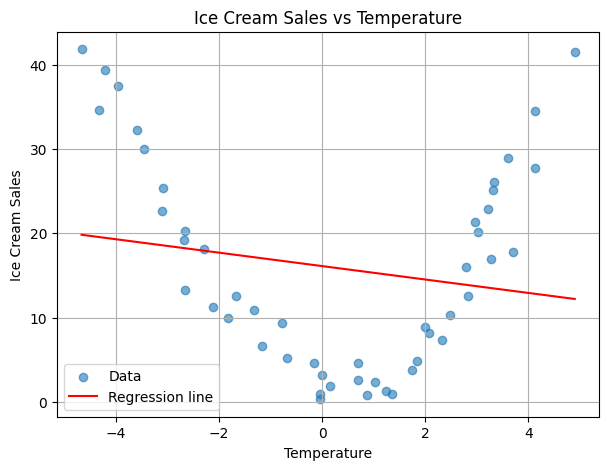

[np.float64(16.121749391993667), np.float64(-0.7964571107159999)]

In [17]:
def ice_cream_selling(data):
    """
    Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

    Args:
        data: ice cream sales data.

    Returns:
        list: The list of model theta parameters.
    """
    header = data[0].strip().split(",")
    header_lower = [h.lower() for h in header]

    temp_idx = next(i for i, h in enumerate(header_lower) if "temp" in h)
    sales_idx = next(i for i, h in enumerate(header_lower) if "sale" in h)

    temps = []
    sales = []

    # Parse values
    for row in data[1:]:
        parts = row.split(",")
        try:
            temps.append(float(parts[temp_idx]))
            sales.append(float(parts[sales_idx]))
        except:
            continue

    X = np.array(temps).reshape(-1, 1)
    y = np.array(sales)

    # Fit model
    model = LinearRegression()
    model.fit(X, y)

    theta0 = model.intercept_
    theta1 = model.coef_[0]

    # Plot
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, label="Data", alpha=0.6)

    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line = model.predict(x_line)

    plt.plot(x_line, y_line, "r", label="Regression line")
    plt.xlabel("Temperature")
    plt.ylabel("Ice Cream Sales")
    plt.title("Ice Cream Sales vs Temperature")
    plt.legend()
    plt.grid(True)
    plt.show()

    return [theta0, theta1]

data = extract_texts_from_file('/content/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

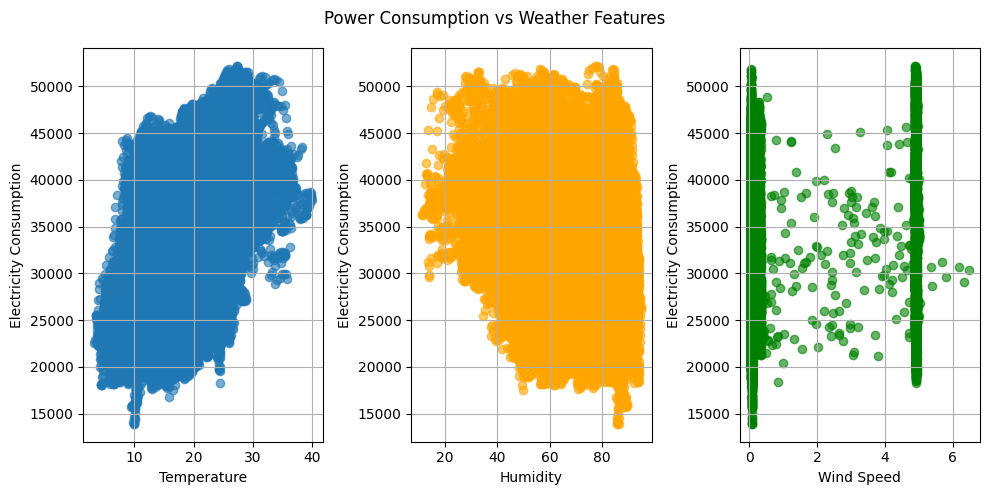

[np.float64(26283.80347819727),
 np.float64(507.41268859951157),
 np.float64(-47.19708160521354),
 np.float64(-133.51833122189825)]

In [23]:
def power_consumption(data):
    header = data[0].strip().split(",")
    header_lower = [h.lower() for h in header]


    temp_idx     = next(i for i, h in enumerate(header_lower) if "temp" in h)
    humidity_idx = next(i for i, h in enumerate(header_lower) if "hum" in h)
    wind_idx     = next(i for i, h in enumerate(header_lower) if "wind" in h)
    consume_idx  = next(i for i, h in enumerate(header_lower) if "cons" in h)

    temps = []
    hums = []
    winds = []
    consumption = []


    for row in data[1:]:
        parts = row.strip().split(",")
        try:
            temps.append(float(parts[temp_idx]))
            hums.append(float(parts[humidity_idx]))
            winds.append(float(parts[wind_idx]))
            consumption.append(float(parts[consume_idx]))
        except:
            continue

    X = np.column_stack([temps, hums, winds])
    y = np.array(consumption)


    model = LinearRegression()
    model.fit(X, y)

    theta0 = model.intercept_
    theta  = model.coef_

    fig = plt.figure(figsize=(10, 5))


    ax1 = fig.add_subplot(1, 3, 1)
    ax1.scatter(temps, consumption, alpha=0.6)
    ax1.set_xlabel("Temperature")
    ax1.set_ylabel("Electricity Consumption")
    ax1.grid(True)


    ax2 = fig.add_subplot(1, 3, 2)
    ax2.scatter(hums, consumption, alpha=0.6, color="orange")
    ax2.set_xlabel("Humidity")
    ax2.set_ylabel("Electricity Consumption")
    ax2.grid(True)


    ax3 = fig.add_subplot(1, 3, 3)
    ax3.scatter(winds, consumption, alpha=0.6, color="green")
    ax3.set_xlabel("Wind Speed")
    ax3.set_ylabel("Electricity Consumption")
    ax3.grid(True)

    plt.suptitle("Power Consumption vs Weather Features")
    plt.tight_layout()
    plt.show()


    return [theta0, *theta]


data = extract_texts_from_file('/content/powerconsumption.csv')
power_consumption(data)

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.869


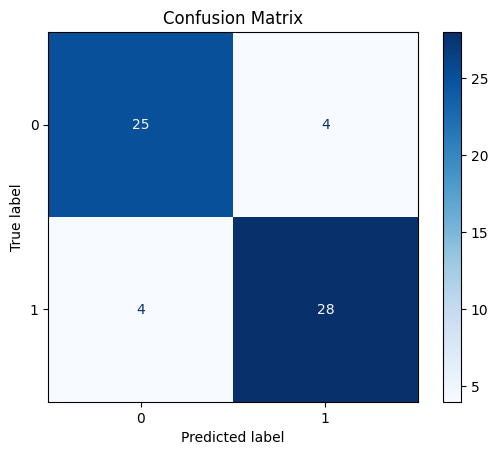

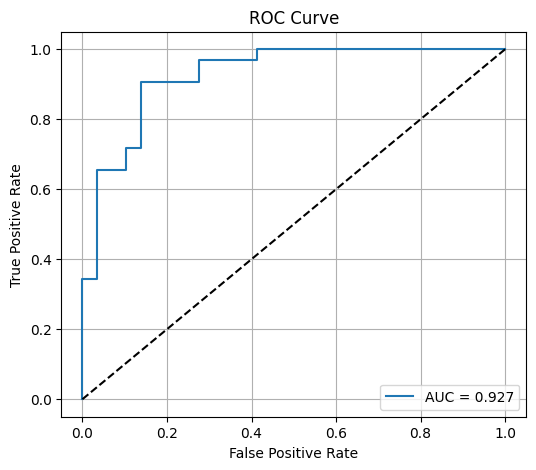

[np.float64(0.09191158508432398),
 0.009082454855498686,
 -1.316454555584656,
 0.7964074267342366,
 -0.012096381446483085,
 -0.0023630314819246966,
 0.039093769126169596,
 0.5691924082050861,
 0.026437129065729665,
 -0.88532506262602,
 -0.6207465710858772,
 0.6565594914307628,
 -0.7804126463947924,
 -0.8697727482910329]

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

def heart_classification(data):

    header = data[0].strip().split(",")
    header_lower = [h.lower() for h in header]

    target_idx = next(i for i, h in enumerate(header_lower) if "output" in h)
    feature_indices = [i for i in range(len(header)) if i != target_idx]

    X = []
    y = []


    for row in data[1:]:
        parts = row.strip().split(",")
        if len(parts) < len(header):
            continue
        try:
            features = [float(parts[i]) for i in feature_indices]
            label = int(parts[target_idx])
        except:
            continue

        X.append(features)
        y.append(label)

    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LogisticRegression(max_iter=200, solver="lbfgs")
    model.fit(X_train, y_train)


    accuracy = model.score(X_test, y_test)
    print(f"Accuracy: {accuracy:.3f}")


    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()



    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


    theta0 = model.intercept_[0]
    thetas = model.coef_[0].tolist()

    return [theta0] + thetas

data = extract_texts_from_file('/content/heart.csv')
heart_classification(data)

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.

Dataset shape: (117, 16)
  manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360     0  21.50       1.8       140   
1    Acura       TL  39.384  19.875     0  28.40       3.2       225   
2    Acura       RL   8.588  29.725     0  42.00       3.5       210   
3     Audi       A4  20.397  22.255     0  23.99       1.8       150   
4     Audi       A6  18.780  23.555     0  33.95       2.8       200   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0  
manufact      object
model         object
sales        float64
resale       float64
type    

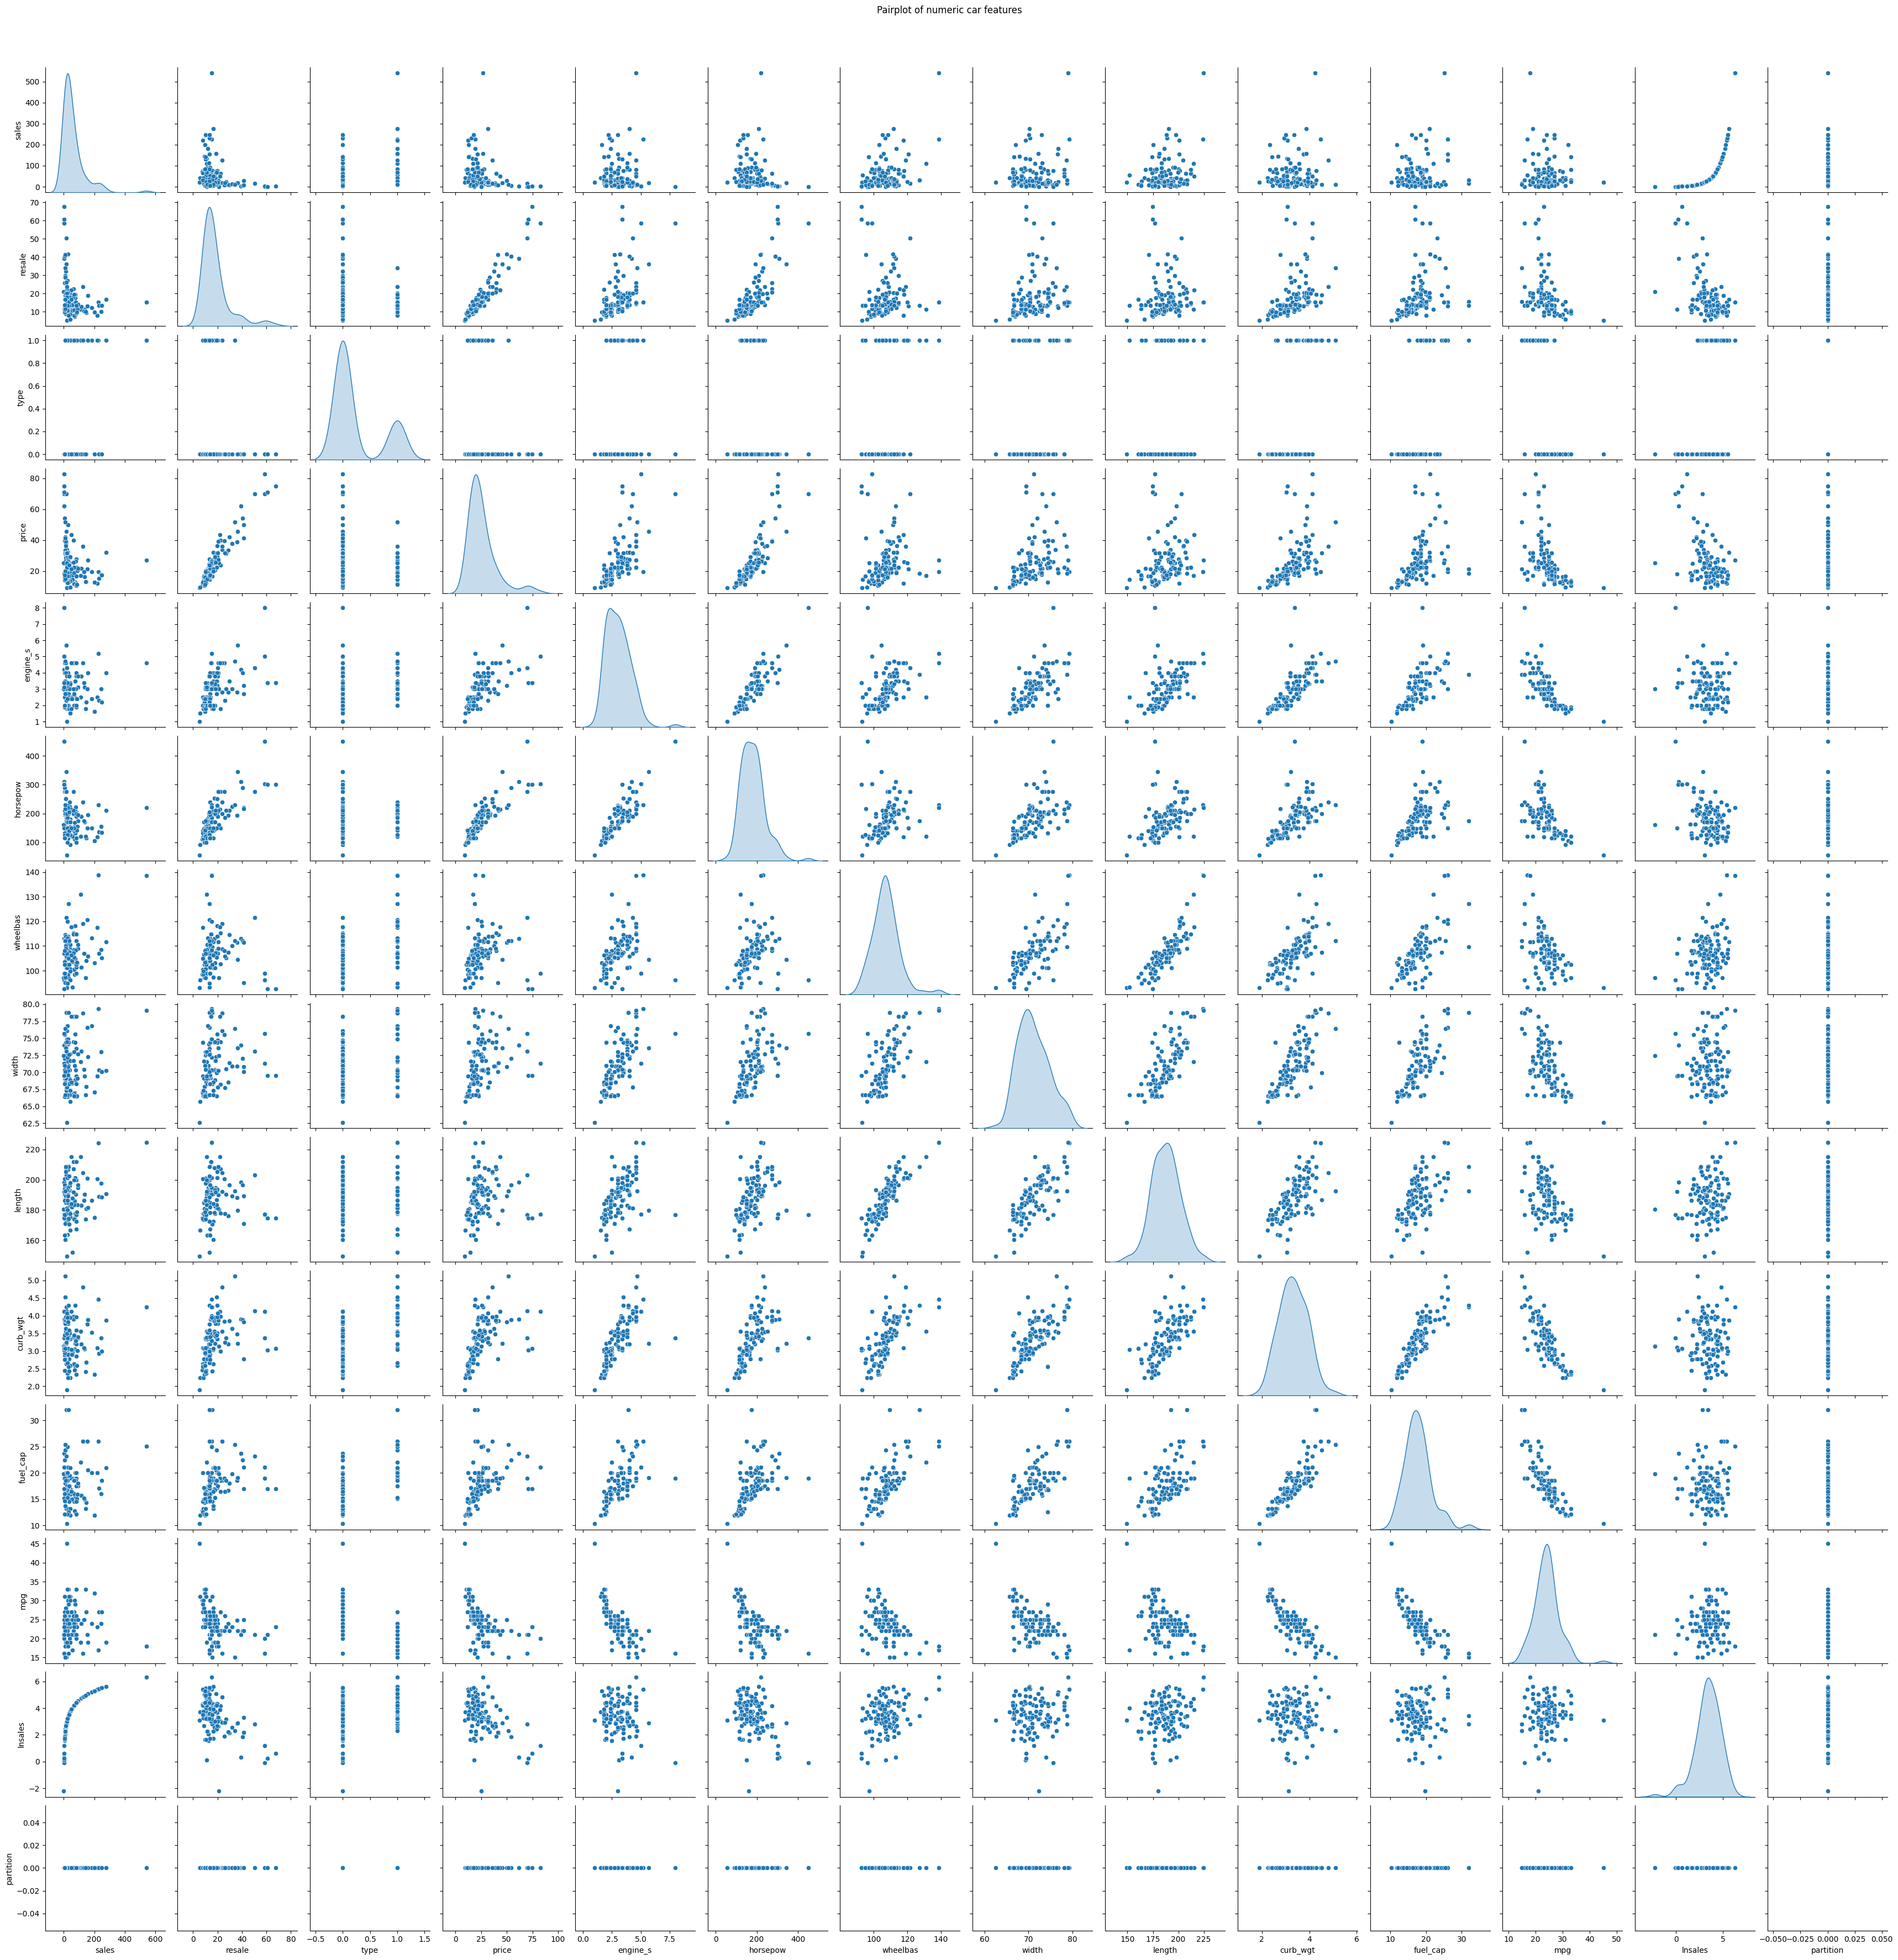

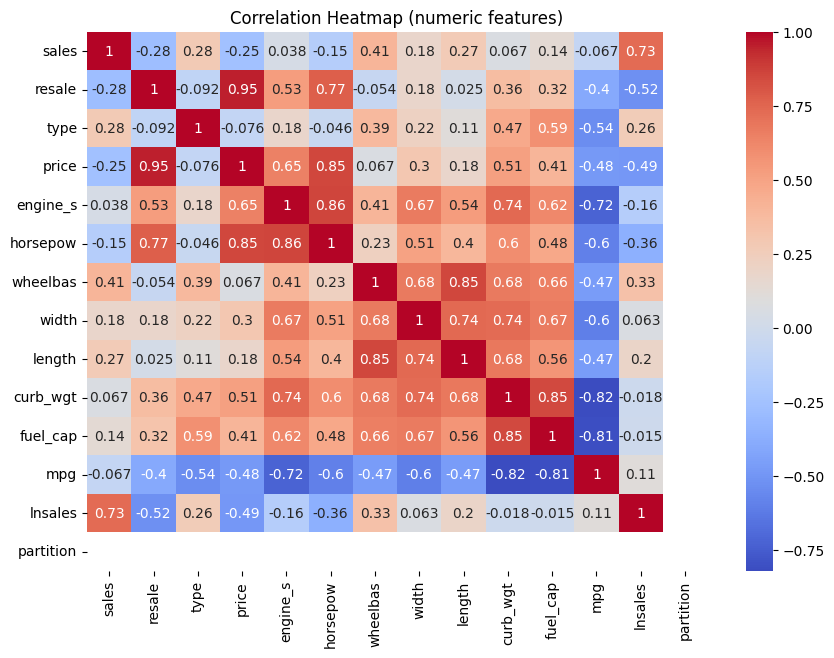

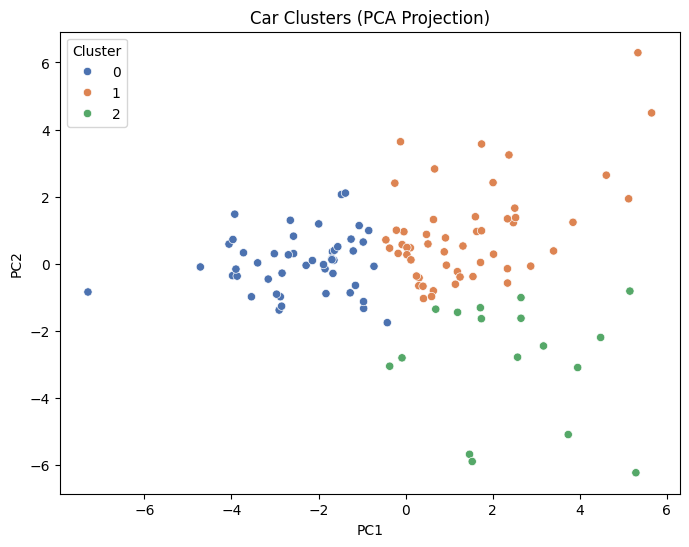

Cluster centers: [[-0.02504131 -0.51581358 -0.3810574  -0.63931863 -0.85935795 -0.78651945
  -0.5828674  -0.77588015 -0.71162778 -0.92178955 -0.80896794  0.76647352
   0.09817254  0.        ]
 [ 0.24167093 -0.16718857  0.49487974 -0.02981756  0.45881234  0.23249749
   0.59476918  0.60418167  0.64936412  0.6648836   0.5513859  -0.50050641
   0.3469374   0.        ]
 [-0.66852383  1.96781514 -0.43782302  1.89634161  1.02299647  1.509592
  -0.17355072  0.3426353   0.0230117   0.56893832  0.59755261 -0.63319976
  -1.33841334  0.        ]]


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def analyze_extra_file(path):

    df = pd.read_csv(path)
    print("Dataset shape:", df.shape)
    print(df.head())
    print(df.dtypes)


    numeric_df = df.select_dtypes(include=[np.number])
    print("Numeric columns:", numeric_df.columns.tolist())


    if numeric_df.empty:
        raise ValueError("No numeric columns found for clustering.")


    sns.pairplot(numeric_df, diag_kind="kde")
    plt.suptitle("Pairplot of numeric car features", y=1.02)
    plt.show()

    plt.figure(figsize=(10, 7))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap (numeric features)")
    plt.show()


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_df)


    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    df["Cluster"] = clusters


    pca = PCA(n_components=2)
    coords = pca.fit_transform(X_scaled)

    df["PC1"] = coords[:, 0]
    df["PC2"] = coords[:, 1]


    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x="PC1", y="PC2",
        hue="Cluster",
        palette="deep"
    )
    plt.title("Car Clusters (PCA Projection)")
    plt.show()


    return kmeans.cluster_centers_

centers = analyze_extra_file("/content/cars_clus.csv")
print("Cluster centers:", centers)


